### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

### Import Dataset

各類車種通行量統計

依車輛種類通過單一偵測站統計之交通量 

TimeInterval：報表產製時間(每5分鐘統計)。 

GantryID：測站編號，例如01F0005N即為[基隆-基隆端]。

Direction：車行方向，S南、N北。

VehicleType：車種 

31小客車、32小貨車 
41大客車、42大貨車 
5聯結車 

Counts：計算單一偵測站於此時階範圍內所經過之車流總量 

In [2]:
data = pd.read_csv('output_2.csv', delimiter=',', nrows = 1000)
data.dataframeName = 'output_2.csv'

In [3]:
data.head(10)

,TimeInterval,GantryID,Direction,VehicleType,Counts
0,2017-03-14 19:40:00,01F0005N,N,31,106
1,2017-03-14 19:40:00,01F0005N,N,32,16
2,2017-03-14 19:40:00,01F0005N,N,41,5
3,2017-03-14 19:40:00,01F0005N,N,42,2
4,2017-03-14 19:40:00,01F0005N,N,5,0
5,2017-03-14 19:40:00,01F0005S,S,31,73
6,2017-03-14 19:40:00,01F0005S,S,32,11
7,2017-03-14 19:40:00,01F0005S,S,41,9
8,2017-03-14 19:40:00,01F0005S,S,42,2
9,2017-03-14 19:40:00,01F0005S,S,5,1


### Function

In [4]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [5]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [6]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) 
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

### Exploratory Data Analysis of first 1000 data

In [7]:
numerical_columns = ['VehicleType','Counts']
categorical_columns = ['TimeInterval', 'GantryID', 'Direction']

In [8]:
data[numerical_columns].describe()

,VehicleType,Counts
count,1000.000000,1000.000000
mean,30.200000,42.137000
std,13.384287,66.604703
min,5.000000,0.000000
25%,31.000000,5.000000
50%,32.000000,12.000000
75%,41.000000,45.000000
max,42.000000,445.000000


### Distribution graphs (TimeInterval: 2017-03-14 19:40:00) of 1000 data

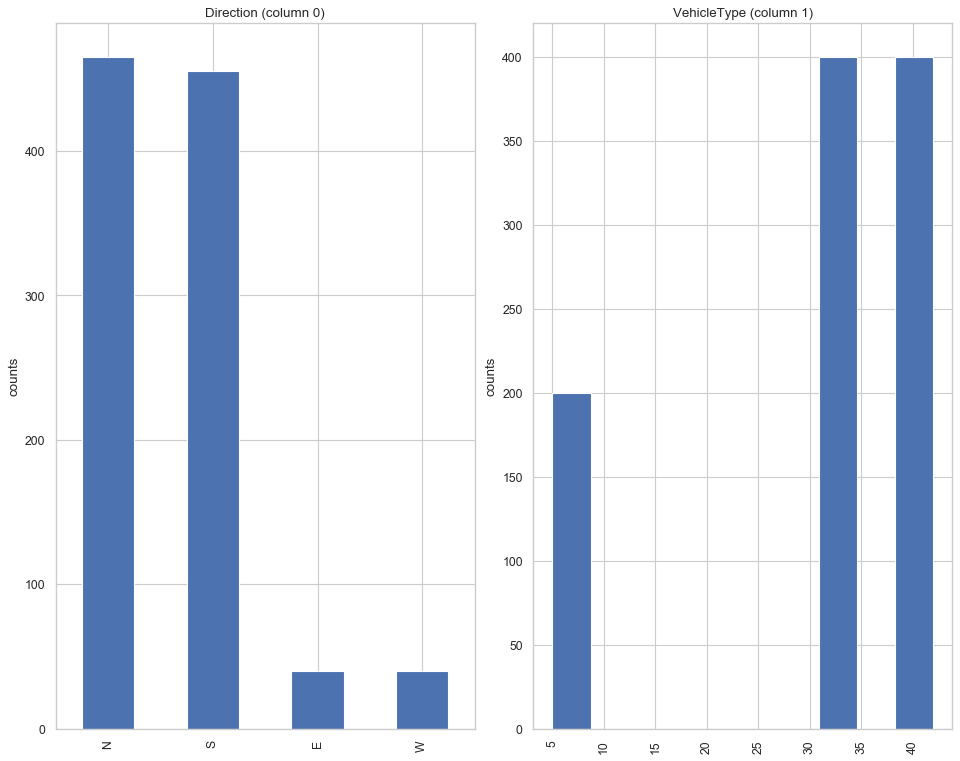

In [9]:
plotPerColumnDistribution(data, 10, 5)

### Correlation matrix (TimeInterval: 2017-03-14 19:40:00) of 1000 data

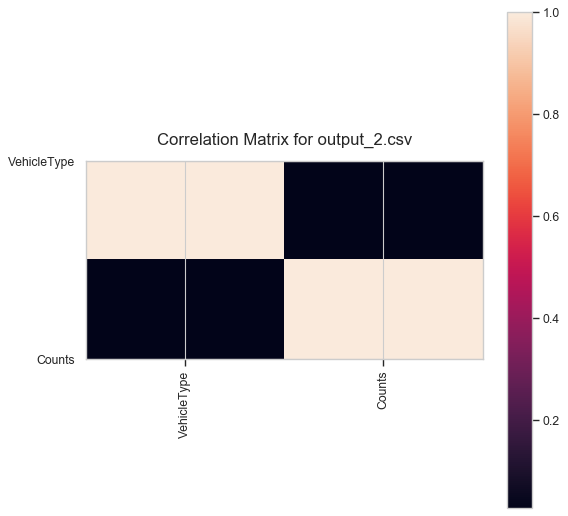

In [10]:
plotCorrelationMatrix(data, 8)

### Scatter and density plots (TimeInterval: 2017-03-14 19:40:00) of 1000 data

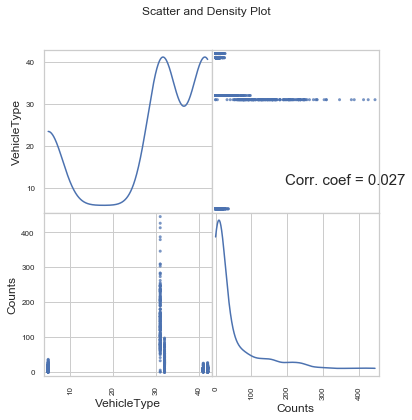

In [11]:
plotScatterMatrix(data, 6, 15)

### Filter the data by TimeInterval, GantryID, and Counts

In [12]:
df = pd.read_csv('output_2.csv', delimiter=',')
df = df.groupby(['TimeInterval','GantryID'])['Counts'].sum().to_frame().reset_index()
df

,TimeInterval,GantryID,Counts
0,2017-02-17 00:00:00,01F0005N,41
1,2017-02-17 00:00:00,01F0005S,30
2,2017-02-17 00:00:00,01F0017N,36
3,2017-02-17 00:00:00,01F0017S,28
4,2017-02-17 00:00:00,01F0029N,58
...,...,...,...
4705915,2017-03-31 23:55:00,10G0139W,27
4705916,2017-03-31 23:55:00,10G0184E,40
4705917,2017-03-31 23:55:00,10G0216E,27
4705918,2017-03-31 23:55:00,10G0216W,5


### Exploratory Data Analysis of "Counts" data

In [13]:
df['Counts'].describe()

count    4.705920e+06
mean     1.595319e+02
std      1.369250e+02
min      0.000000e+00
25%      4.700000e+01
50%      1.210000e+02
75%      2.440000e+02
max      1.008000e+03
Name: Counts, dtype: float64

### Sort the data and show the biggest 5 in which "GantryID" and "TimeInterval"

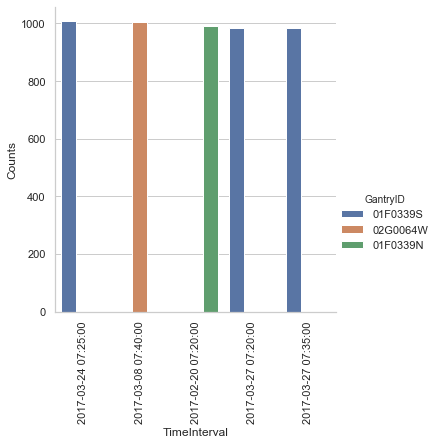

In [14]:
g = sns.catplot(x="TimeInterval", y="Counts", hue="GantryID", data=df.sort_values(by='Counts', ascending=False).head(5), kind="bar")
g.set_xticklabels(rotation=90)

### Select the data by 'GantryID' and 'TimeInterval' that we want

In [15]:
df1 = df.loc[(df['TimeInterval'] > '2017-03-31 23:30:00' ) & (df['TimeInterval'] <= '2017-03-31 23:55:00') & (df['GantryID'] == '01F0029N')]
df1

,TimeInterval,GantryID,Counts
4704024,2017-03-31 23:35:00,01F0029N,129
4704404,2017-03-31 23:40:00,01F0029N,75
4704784,2017-03-31 23:45:00,01F0029N,97
4705164,2017-03-31 23:50:00,01F0029N,90
4705544,2017-03-31 23:55:00,01F0029N,98


### Filter the data by "TimeInterval"  between 1 hour

In [16]:
df['TimeInterval'] = pd.to_datetime(df.TimeInterval)
df2 = df.groupby([pd.Grouper(key='TimeInterval', freq='H'), 'GantryID'])['Counts'].sum().to_frame().reset_index()
df2

,TimeInterval,GantryID,Counts
0,2017-02-17 00:00:00,01F0005N,465
1,2017-02-17 00:00:00,01F0005S,387
2,2017-02-17 00:00:00,01F0017N,492
3,2017-02-17 00:00:00,01F0017S,369
4,2017-02-17 00:00:00,01F0029N,672
...,...,...,...
392155,2017-03-31 23:00:00,10G0139W,474
392156,2017-03-31 23:00:00,10G0184E,521
392157,2017-03-31 23:00:00,10G0216E,313
392158,2017-03-31 23:00:00,10G0216W,191


### Filter the data by GantryID and selected Time

In [17]:
df2 = df2.loc[(df2['GantryID'] == '01F0029N') & (df2['TimeInterval'] >= '2017-03-24 00:00:00') & (df2['TimeInterval'] <= '2017-03-25 00:00:00') ]
df2['TimeInterval'] = df2.TimeInterval.dt.strftime('%Y-%m-%d %H:%M:%S')
df2

,TimeInterval,GantryID,Counts
319204,2017-03-24 00:00:00,01F0029N,615
319584,2017-03-24 01:00:00,01F0029N,513
319964,2017-03-24 02:00:00,01F0029N,472
320344,2017-03-24 03:00:00,01F0029N,493
320724,2017-03-24 04:00:00,01F0029N,416
321104,2017-03-24 05:00:00,01F0029N,376
321484,2017-03-24 06:00:00,01F0029N,723
321864,2017-03-24 07:00:00,01F0029N,1672
322244,2017-03-24 08:00:00,01F0029N,1632
322624,2017-03-24 09:00:00,01F0029N,1744


### Show the plot of filtered data

C:\Users\aushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


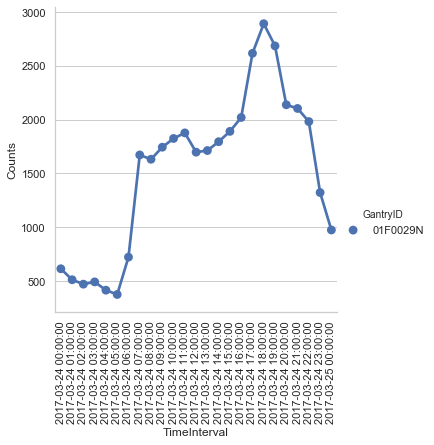

In [18]:
g2 = sns.catplot(x="TimeInterval", y="Counts", hue="GantryID", data=df2, kind="point")
g2.set_xticklabels(rotation=90)